In [102]:
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from collections import defaultdict
from nltk.stem import WordNetLemmatizer
import nltk
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from os import path
import math
import json

In [20]:
CharacterDialogue = {}

# Opening JSON file
with open('CharacterDialogue.json', encoding='utf-8') as json_file:
    data = json.load(json_file)
    CharacterDialogue = data

In [99]:
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')
tokenizer = RegexpTokenizer(r'\w+')
wnl = nltk.WordNetLemmatizer()
extra_stopwords = ["u"]
stop_words = stop_words + extra_stopwords


In [100]:

characters = ['frodo baggins','aragorn ii elessar','boromir','meriadoc brandybuck','samwise gamgee','gandalf','gimli','gollum','legolas','saruman','peregrin took']

charWords = {}
nltkChar = {}
fdistChar = {}
for name in characters:
    data = CharacterDialogue[name]
    charWords[name] = []
    for item in data:
        tokens = nltk.word_tokenize(item)
        words = [w.lower() for w in tokens if w.isalpha()]
        clean_words = [wnl.lemmatize(w) for w in words if w not in stop_words]  # Lemmatize the words and skip stopwords
        charWords[name].extend(clean_words)
    nltkChar[name] =  nltk.Text(charWords[name])
    fdistChar[name] = nltk.FreqDist(nltkChar[name])

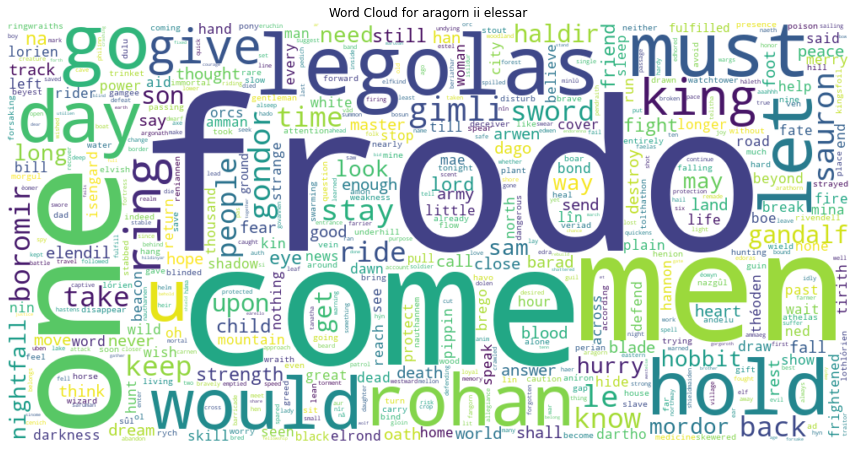

In [91]:
c = characters[1]
ring_mask = np.array(Image.open("cloudMasks/boromir.jpeg"))

plt.figure(figsize=(12,8))
wordcloud = WordCloud(background_color="white", 
                      width=1000,
                      height=500,
                      max_words=2000).generate_from_frequencies(fdistChar[c])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for ' + c)
plt.tight_layout()
plt.show()

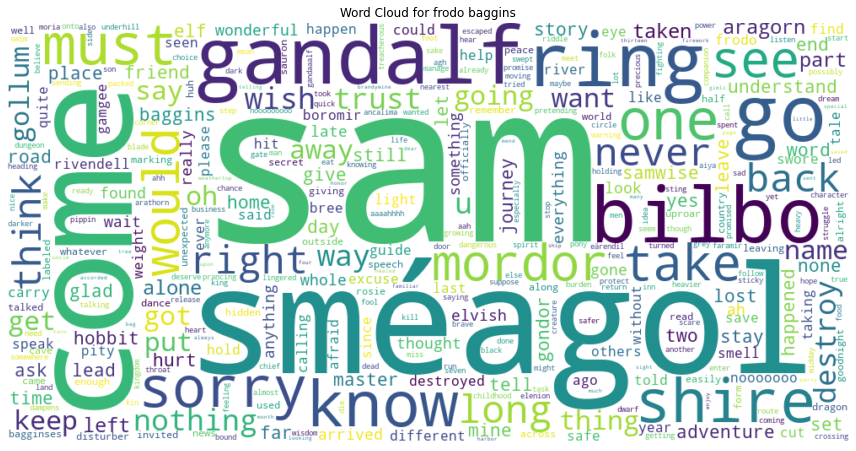

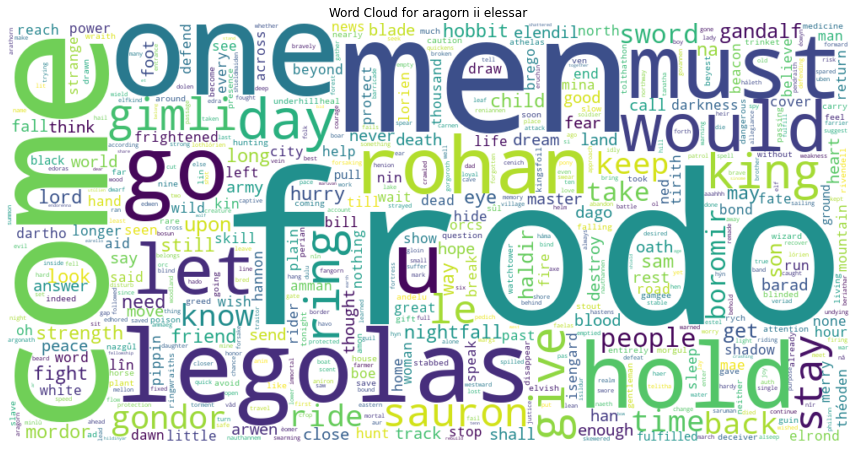

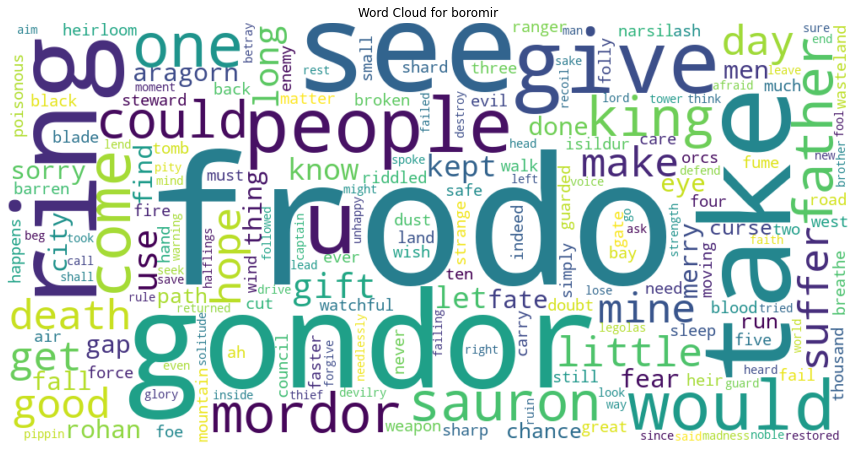

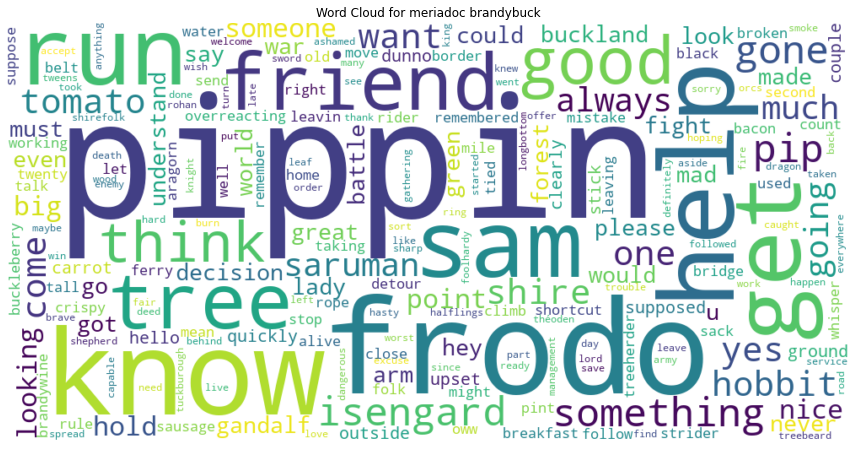

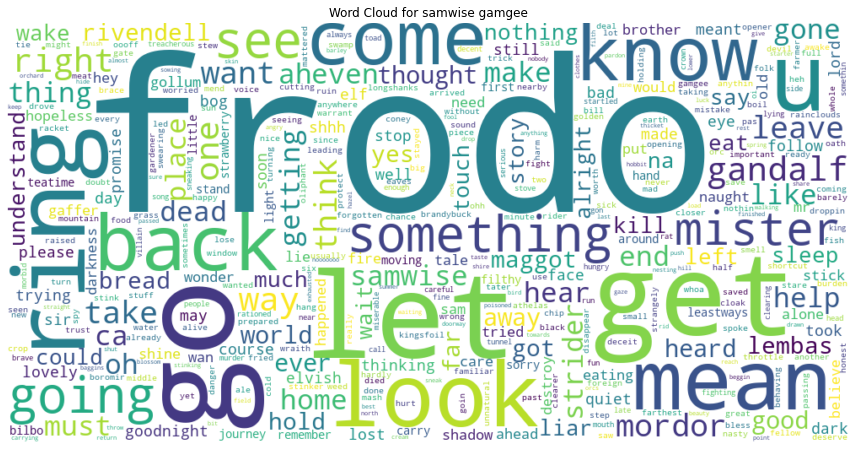

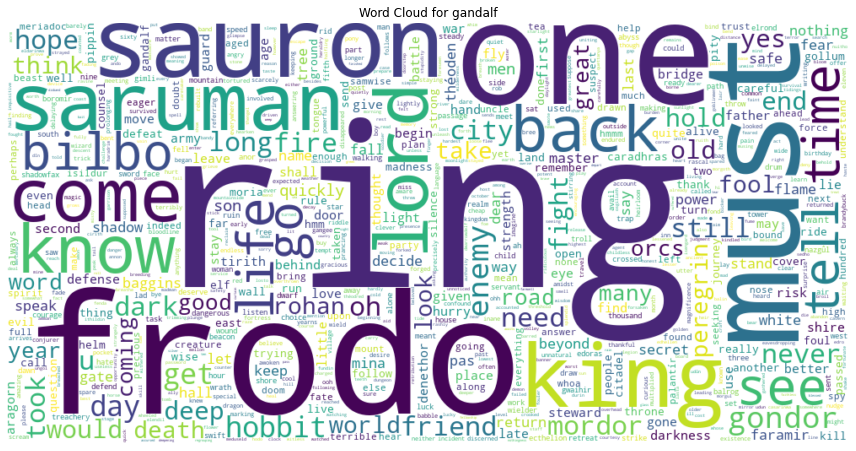

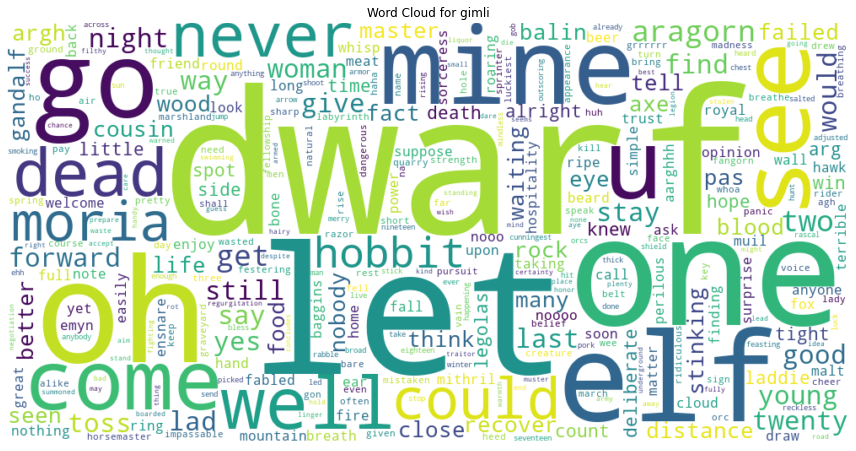

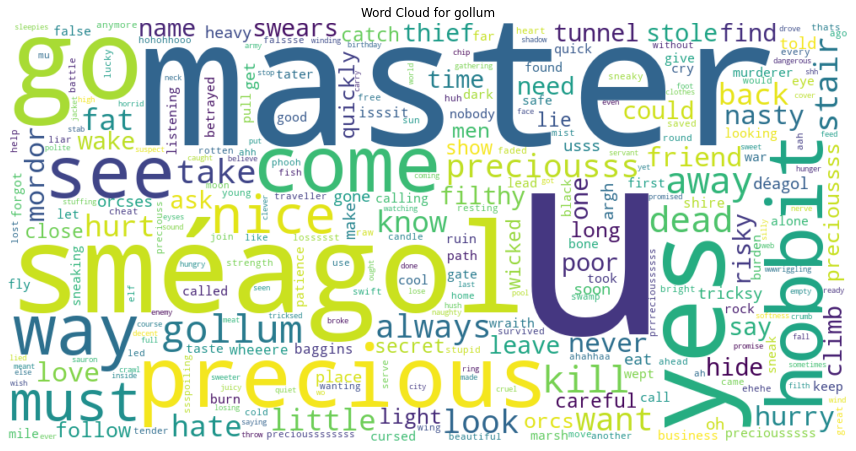

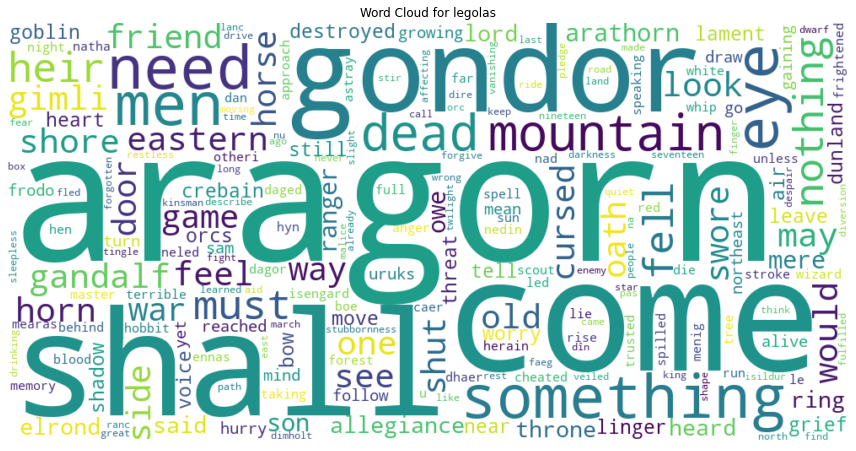

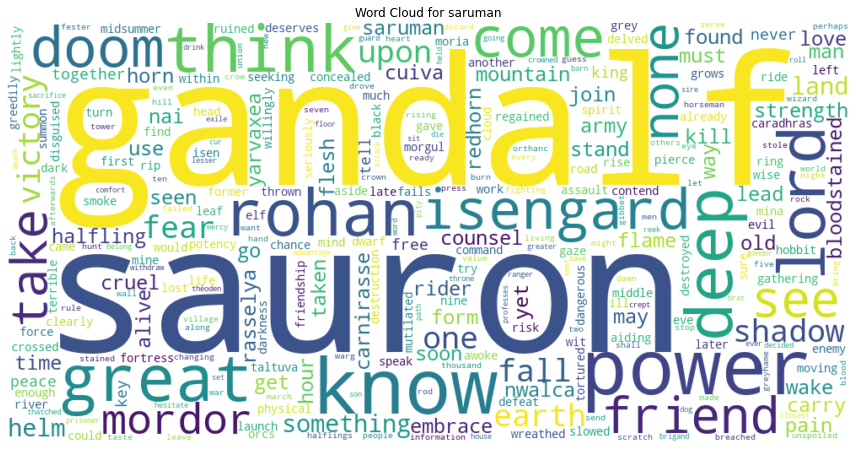

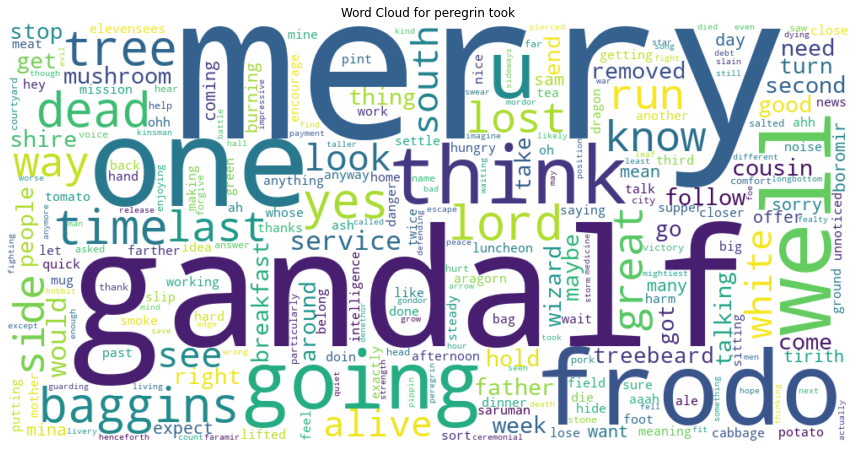

In [101]:
for name in characters:
    plt.figure(figsize=(12,8))
    wordcloud = WordCloud(background_color="white", 
                        width=1000,
                        height=500,
                        max_words=2000).generate_from_frequencies(fdistChar[name])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Word Cloud for ' + name)
    plt.tight_layout()
    plt.show()

In [103]:
def calcRateScript(theScript):
    wordsInScript = defaultdict(list)
    appearsInScripts = defaultdict(list)
    
    nltk_script = nltk.Text(theScript)
    fdist_script = nltk.FreqDist(nltk_script)
        
    for word in fdist_script:
        wordTC = fdist_script[word]

        wordsInScript[word].append(wordTC)
        appearsInScripts[word].append(book)#TODO spyrja Anton

    superstring = ""
    for key, value in wordsInScript.items():
        TC = sum(value)
        IDF = math.log(len(theScript) / len(appearsInScripts[key]))

        TCIDF = math.ceil(TC*IDF)

        superstring += (key + " ") * TCIDF
    
    return superstring